# Sentiment Analysis
## Introduction

When it comes to text data, there are a few popular techniques that enable us to extract useful information from data. Analyzing text and generating results is it different from dealing with numerical data. One such basic technique is sentiment analysis. A few key points to remember with sentiment analysis are:

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
 - **Polarity:** How positive or negative a word is. -1 is very negative. +1 is very positive.
 -  **Subjectivity:** How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [2]:
# reading corpus
import pandas as pd
data = pd.read_pickle('pickle files/corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


**NOTE:** We are using corpus for sentiment analysis and not document term matrix because the later works as a bag of words i.e. text words are in unordered fashion in that. Where as a corpus proves useful as it preserves the word order.

In [3]:
# creating lambda function to find polarity and subjectivity
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.072941,0.480068
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.058556,0.554817
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.018528,0.535308
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.077803,0.535501
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,0.000649,0.511280
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.089463,0.459183
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.047214,0.520927
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.008589,0.548734
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.084839,0.481008
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.060359,0.512691


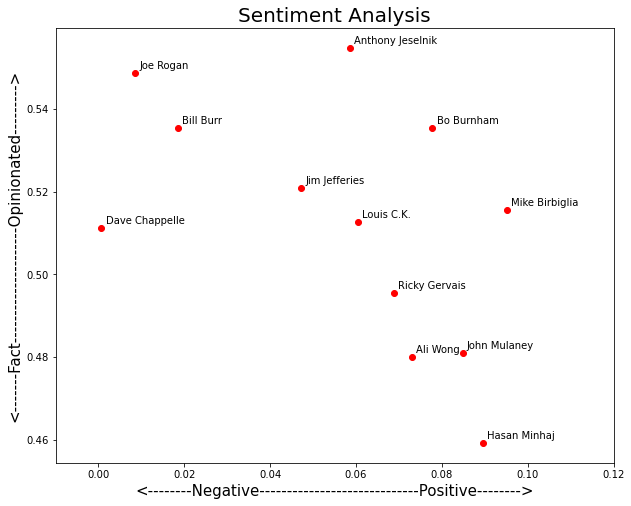

In [7]:
# plotting the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color = 'red')
    plt.text(x+.001, y+ .001, data['full_name'][index], fontsize = 10)
    plt.xlim(-.01, .12)
    
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('<--------Negative-----------------------------Positive-------->', fontsize = 15)
plt.ylabel('<-------Fact---------------------Opinionated--------->', fontsize = 15)

plt.show()

## Sentiment of Routine Over Time
Instead of sentiment analysis for complete routine, let us check for the sentiments of different comedians over time during the routine.

In [15]:
# necessary imports
import numpy as np
import math

# splitting text into n equal parts for analysis
def split_text(text, n = 10):
    # calculate the length pf whole text, size of each splitted text and
    # starting point of each split
    length = len(text)
    size = math.floor(length/n)
    start = np.arange(0, length, size)
    
    # pulling out equally sized pieces of text and putting into list
    split_list = []
    for split in range(n):
        split_list.append(text[start[split]:start[split] + size])
    return split_list

In [21]:
# creating list to store the splitted text
list_of_splits = []
for text in data['transcript']:
    split = split_text(text)
    list_of_splits.append(split)
    
list_of_splits[0]

['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to

In [26]:
# calculating the polarity for each chunk of text
pol_transcript = []
for split in list_of_splits:
    pol_piece = []
    for p in split:
        pol_piece.append(TextBlob(p).sentiment.polarity)
    pol_transcript.append(pol_piece)
    
pol_transcript

[[0.10982341269841271,
  0.07011794532627867,
  0.0676048790179225,
  0.1006832611832612,
  -0.042106537530266344,
  0.15212721992995432,
  0.03777319719753929,
  0.1084305944600062,
  0.03120877805145047,
  0.09753441003441002],
 [0.14379144175440475,
  -0.08626336898395723,
  -0.018946837994457046,
  0.008620931537598207,
  0.14702030970687688,
  0.14331413210445468,
  0.09411111111111112,
  -0.028245525160418773,
  0.052098364598364595,
  0.09870097074642528],
 [-0.032260689190037016,
  0.003301963736746346,
  0.037026561639963707,
  0.020883488676856007,
  -0.05097013552895906,
  0.10362285390346615,
  0.0211446684102934,
  -0.031291631235827656,
  -0.02404719689294159,
  0.12385614620784116],
 [0.17482295482295487,
  -0.05915352957589287,
  -0.01911550065231571,
  0.029905960329689143,
  0.07549027691884834,
  -0.03846844293272864,
  0.04594444444444445,
  0.2085892878724022,
  0.18630720470006185,
  0.18361742424242422],
 [-0.05093449586407334,
  -0.0731522199737097,
  0.05736373

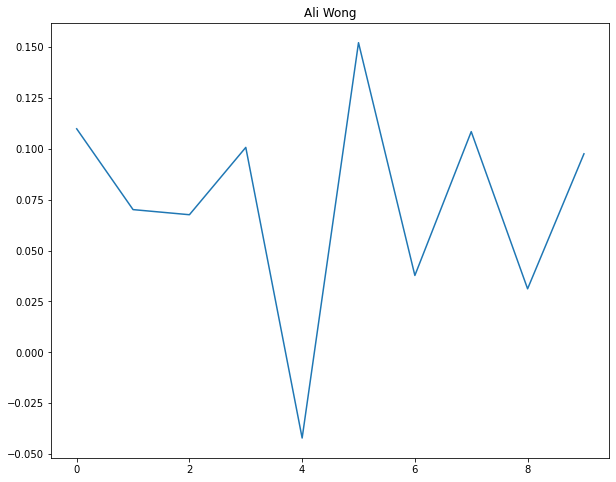

In [30]:
# plotting the graph of polarity for one comedian
plt.plot(pol_transcript[0])
plt.title(data['full_name'][0])
plt.show()

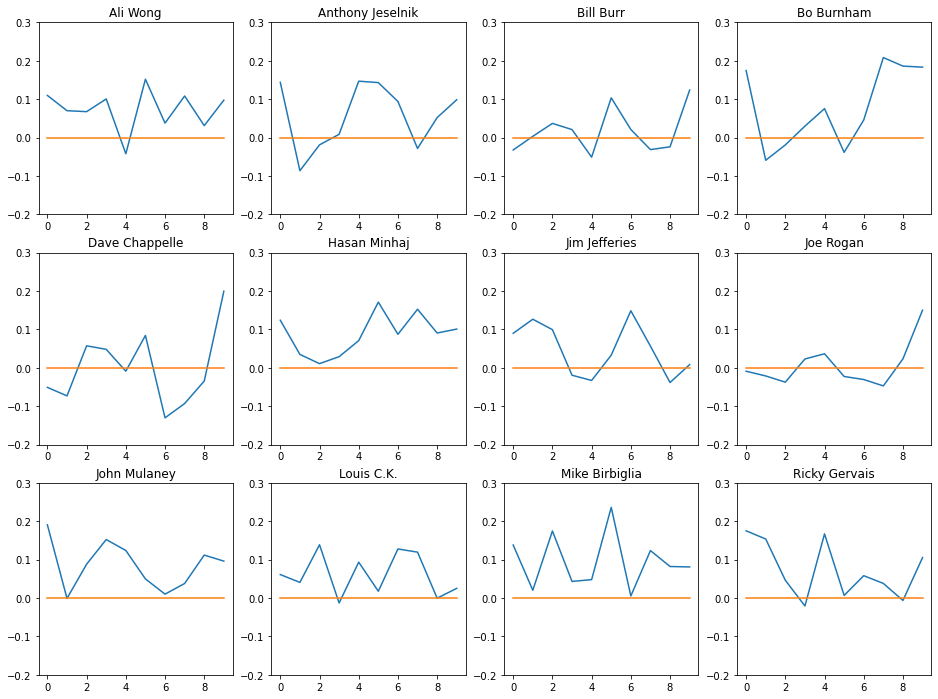

In [32]:
# plotting the curve for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(pol_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

**From above plots, I can infer that**
1. Ali Wong stays pretty positive throughout her routine. Similar pattern is shown by John Mulaney, Louis C.K. and Mike.
2. While Dave Chappelle has little positivity in his routine with mostly negative, Joe Rogan kicks in with negative sentiment and ends off positive  
